# Data Exploration

1. What is the avareage ROI (Gross/Budget) for Country?
2. How do rating compare to Budget, Gross and ROI.

In [28]:
# Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [29]:
Movies = Path("movies.csv")

In [30]:
Omdb = Path("omdb.csv")

In [31]:
# Import datasets Movies
movies_df = pd.read_csv(Movies)
#movies_df.head(3)

In [32]:
# Import datasets Omdb
omdb_df = pd.read_csv(Omdb)
#omdb_df.head(3)

In [33]:
# columns manipulations Movie
movies_df.columns

Index(['movieid', 'title', 'mpaa_rating', 'budget', 'gross', 'release_date',
       'genre', 'runtime', 'rating', 'rating_count', 'summary'],
      dtype='object')

In [34]:
movies_df = movies_df[['title', 'mpaa_rating', 'genre','budget', 'gross','rating',]]
#movies_df.head(3)

In [35]:
movies_df = movies_df.rename(columns={"title":"Title"})
#movies_df.head(3)

In [36]:
# columns manipulations Omdb
omdb_df.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'Error',
       'totalSeasons'],
      dtype='object')

In [37]:
omdb_df = omdb_df[['Title',  'Genre',  'Country', 'Awards','DVD']]
omdb_df.head(3)

,Title,Genre,Country,Awards,DVD
0,Look Who's Talking,Comedy,United States,5 wins & 2 nominations,12-Feb-14
1,Driving Miss Daisy,"Comedy, Drama, Romance",United States,Won 4 Oscars. 22 wins & 24 nominations total,3-Oct-08
2,Turner & Hooch,"Comedy, Crime, Drama",United States,1 win & 1 nomination,1-Jan-14


In [38]:
# columns manipulations Merged
firstM_df = pd.merge(movies_df, omdb_df, how="left", on="Title")
firstM_df.columns

Index(['Title', 'mpaa_rating', 'genre', 'budget', 'gross', 'rating', 'Genre',
       'Country', 'Awards', 'DVD'],
      dtype='object')

In [39]:
firstM_df = firstM_df [['Title', 'mpaa_rating', 'genre', 'budget', 'gross', 'rating', 'Genre',
       'Country',]]
firstM_df.head(3)

,Title,mpaa_rating,genre,budget,gross,rating,Genre,Country
0,Look Who's Talking,PG-13,Romance,7500000,296000000,5.9,Comedy,United States
1,Driving Miss Daisy,PG,Comedy,7500000,145793296,7.4,"Comedy, Drama, Romance",United States
2,Turner & Hooch,PG,Crime,13000000,71079915,7.2,"Comedy, Crime, Drama",United States


In [40]:
# Splitting the Country column 
firstM_df[["Country_1","Country_2", "Country_3", "Country_4","Country_5"]]= firstM_df["Country"].str.split(', ', n=4, expand=True)
firstM_df.tail(3)

,Title,mpaa_rating,genre,budget,gross,rating,Genre,Country,Country_1,Country_2,Country_3,Country_4,Country_5
651,Dawn of the Planet of the Apes,PG-13,Science Fiction,170000000,710644566,7.6,"Action, Adventure, Drama","United States, United Kingdom, Canada",United States,United Kingdom,Canada,None,None
652,Guardians of the Galaxy,PG-13,Action,170000000,773328629,8.0,"Action, Adventure, Comedy",United States,United States,None,None,None,None
653,Maleficent,PG,Fantasy,180000000,758539785,7.0,"Adventure, Family, Fantasy",United States,United States,None,None,None,None


In [41]:
# columns 'Country_1', 'Country_2', 'Country_3' into one column
firstM_df= firstM_df.set_index(['Title', 'mpaa_rating', 'genre', 'budget', 'gross', 'rating', 'Genre',
       'Country'])[['Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_5']].stack().reset_index()
firstM_df.tail(3)

,Title,mpaa_rating,genre,budget,gross,rating,Genre,Country,level_8,0
981,Dawn of the Planet of the Apes,PG-13,Science Fiction,170000000,710644566,7.6,"Action, Adventure, Drama","United States, United Kingdom, Canada",Country_3,Canada
982,Guardians of the Galaxy,PG-13,Action,170000000,773328629,8.0,"Action, Adventure, Comedy",United States,Country_1,United States
983,Maleficent,PG,Fantasy,180000000,758539785,7.0,"Adventure, Family, Fantasy",United States,Country_1,United States


In [42]:
# Renaming  "Countries"
firstM_df = firstM_df.rename(columns={0: 'Countries'})

In [43]:
firstM_df= firstM_df[['Title', 'mpaa_rating', 'genre', 'budget', 'gross', 'rating', 'Genre',
       'Country','Countries']]
firstM_df.head(3)

,Title,mpaa_rating,genre,budget,gross,rating,Genre,Country,Countries
0,Look Who's Talking,PG-13,Romance,7500000,296000000,5.9,Comedy,United States,United States
1,Driving Miss Daisy,PG,Comedy,7500000,145793296,7.4,"Comedy, Drama, Romance",United States,United States
2,Turner & Hooch,PG,Crime,13000000,71079915,7.2,"Comedy, Crime, Drama",United States,United States


In [44]:
firstM_df['Countries'].unique()

array(['United States', 'United Kingdom', 'Japan', 'Mexico', 'France',
       'Italy', 'Canada', 'Germany', 'Australia', 'Taiwan', 'Hong Kong',
       'China', 'Malta', 'Morocco', 'Sweden', 'Spain', 'New Zealand',
       'South Korea', 'Hungary', 'Jordan', 'India',
       'United Arab Emirates', 'Netherlands', 'Norway', 'Czech Republic',
       'Russia', 'Switzerland', 'Thailand', 'Bahamas', 'Bulgaria',
       'North Korea', 'Poland', 'Slovenia', 'Belgium', 'USA', 'Turkey',
       'Denmark'], dtype=object)

In [45]:
firstM_df['Countries']

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
979     United States
980    United Kingdom
981            Canada
982     United States
983     United States
Name: Countries, Length: 984, dtype: object

In [46]:
OtraMerged = pd.DataFrame(firstM_df['Countries'].value_counts())
#OtraMerged

In [47]:
grossMerged = firstM_df[['Countries','gross']]
grossMerged = grossMerged .groupby('Countries')
grossMerged = grossMerged .mean().reset_index()
#grossMerged

In [48]:
budgetMerged = firstM_df[['Countries','budget']]
budgetMerged = budgetMerged .groupby('Countries')
budgetMerged = budgetMerged .mean().reset_index()
#budgetMerged

In [49]:
FirstQuestMerged = pd.merge(grossMerged, budgetMerged , on="Countries")
FirstQuestMerged.head()

,Countries,gross,budget
0,Australia,5.129381e+08,129500000.0
1,Bahamas,5.990460e+08,150000000.0
2,Belgium,5.637493e+08,110000000.0
3,Bulgaria,4.541619e+08,60000000.0
4,Canada,5.153787e+08,110450000.0


In [50]:
grossMerged['gross'] = grossMerged['gross'].astype(int)
#grossMerged

In [51]:
budgetMerged ['budget'] = budgetMerged['budget'].astype(int)
#budgetMerged

In [52]:
FirstQuestMerged = pd.merge(grossMerged, budgetMerged , on="Countries")
FirstQuestMerged.head()

,Countries,gross,budget
0,Australia,512938138,129500000
1,Bahamas,599045960,150000000
2,Belgium,563749323,110000000
3,Bulgaria,454161935,60000000
4,Canada,515378698,110450000


In [54]:
#FirstQuestMerged1 = FirstQuestMerged('gross')/ FirstQuestMerged ('budget')
#FirstQuestMerged1

In [55]:
FirstQuestMerged = pd.merge(grossMerged, budgetMerged , on="Countries")
FirstQuestMerged

,Countries,gross,budget
0,Australia,512938138,129500000
1,Bahamas,599045960,150000000
2,Belgium,563749323,110000000
3,Bulgaria,454161935,60000000
4,Canada,515378698,110450000
5,China,583791243,141136363
6,Czech Republic,383247268,148750000
7,Denmark,469160692,60000000
8,France,508045966,79500000
9,Germany,347542121,96764705


In [56]:
FirstQuestMerged = pd.merge(omdb_df, movies_df, on="Title", how="inner")

In [57]:
FirstQuestMerged["ROI"] = (FirstQuestMerged ["gross"] - FirstQuestMerged ["budget"]) / FirstQuestMerged ["budget"]
FirstQuestMerged

,Title,Genre,Country,Awards,DVD,mpaa_rating,genre,budget,gross,rating,ROI
0,Look Who's Talking,Comedy,United States,5 wins & 2 nominations,12-Feb-14,PG-13,Romance,7500000,296000000,5.9,38.466667
1,Driving Miss Daisy,"Comedy, Drama, Romance",United States,Won 4 Oscars. 22 wins & 24 nominations total,3-Oct-08,PG,Comedy,7500000,145793296,7.4,18.439106
2,Turner & Hooch,"Comedy, Crime, Drama",United States,1 win & 1 nomination,1-Jan-14,PG,Crime,13000000,71079915,7.2,4.467686
3,Born on the Fourth of July,"Biography, Drama, War",United States,Won 2 Oscars. 15 wins & 26 nominations total,19-Apr-16,R,War,14000000,161001698,7.2,10.500121
4,Field of Dreams,"Drama, Family, Fantasy",United States,Nominated for 3 Oscars. 8 wins & 14 nomination...,15-Jun-12,PG,Drama,15000000,84431625,7.5,4.628775
...,...,...,...,...,...,...,...,...,...,...,...
616,Interstellar,"Adventure, Drama, Sci-Fi","United States, United Kingdom, Canada",Won 1 Oscar. 44 wins & 148 nominations total,24-May-16,PG-13,Science Fiction,165000000,675120017,8.6,3.091636
617,Captain America: The Winter Soldier,"Action, Adventure, Sci-Fi",United States,Nominated for 1 Oscar. 5 wins & 52 nominations...,19-Aug-14,PG-13,Action,170000000,714766572,7.7,3.204509
618,Dawn of the Planet of the Apes,"Action, Adventure, Drama","United States, United Kingdom, Canada",Nominated for 1 Oscar. 17 wins & 48 nomination...,1-Dec-15,PG-13,Science Fiction,170000000,710644566,7.6,3.180262
619,Guardians of the Galaxy,"Action, Adventure, Comedy",United States,Nominated for 2 Oscars. 52 wins & 103 nominati...,15-Nov-15,PG-13,Action,170000000,773328629,8.0,3.548992


In [58]:
FirstQuestMerged[["Country", "rating", "budget", "gross", "ROI"]].head()

,Country,rating,budget,gross,ROI
0,United States,5.9,7500000,296000000,38.466667
1,United States,7.4,7500000,145793296,18.439106
2,United States,7.2,13000000,71079915,4.467686
3,United States,7.2,14000000,161001698,10.500121
4,United States,7.5,15000000,84431625,4.628775


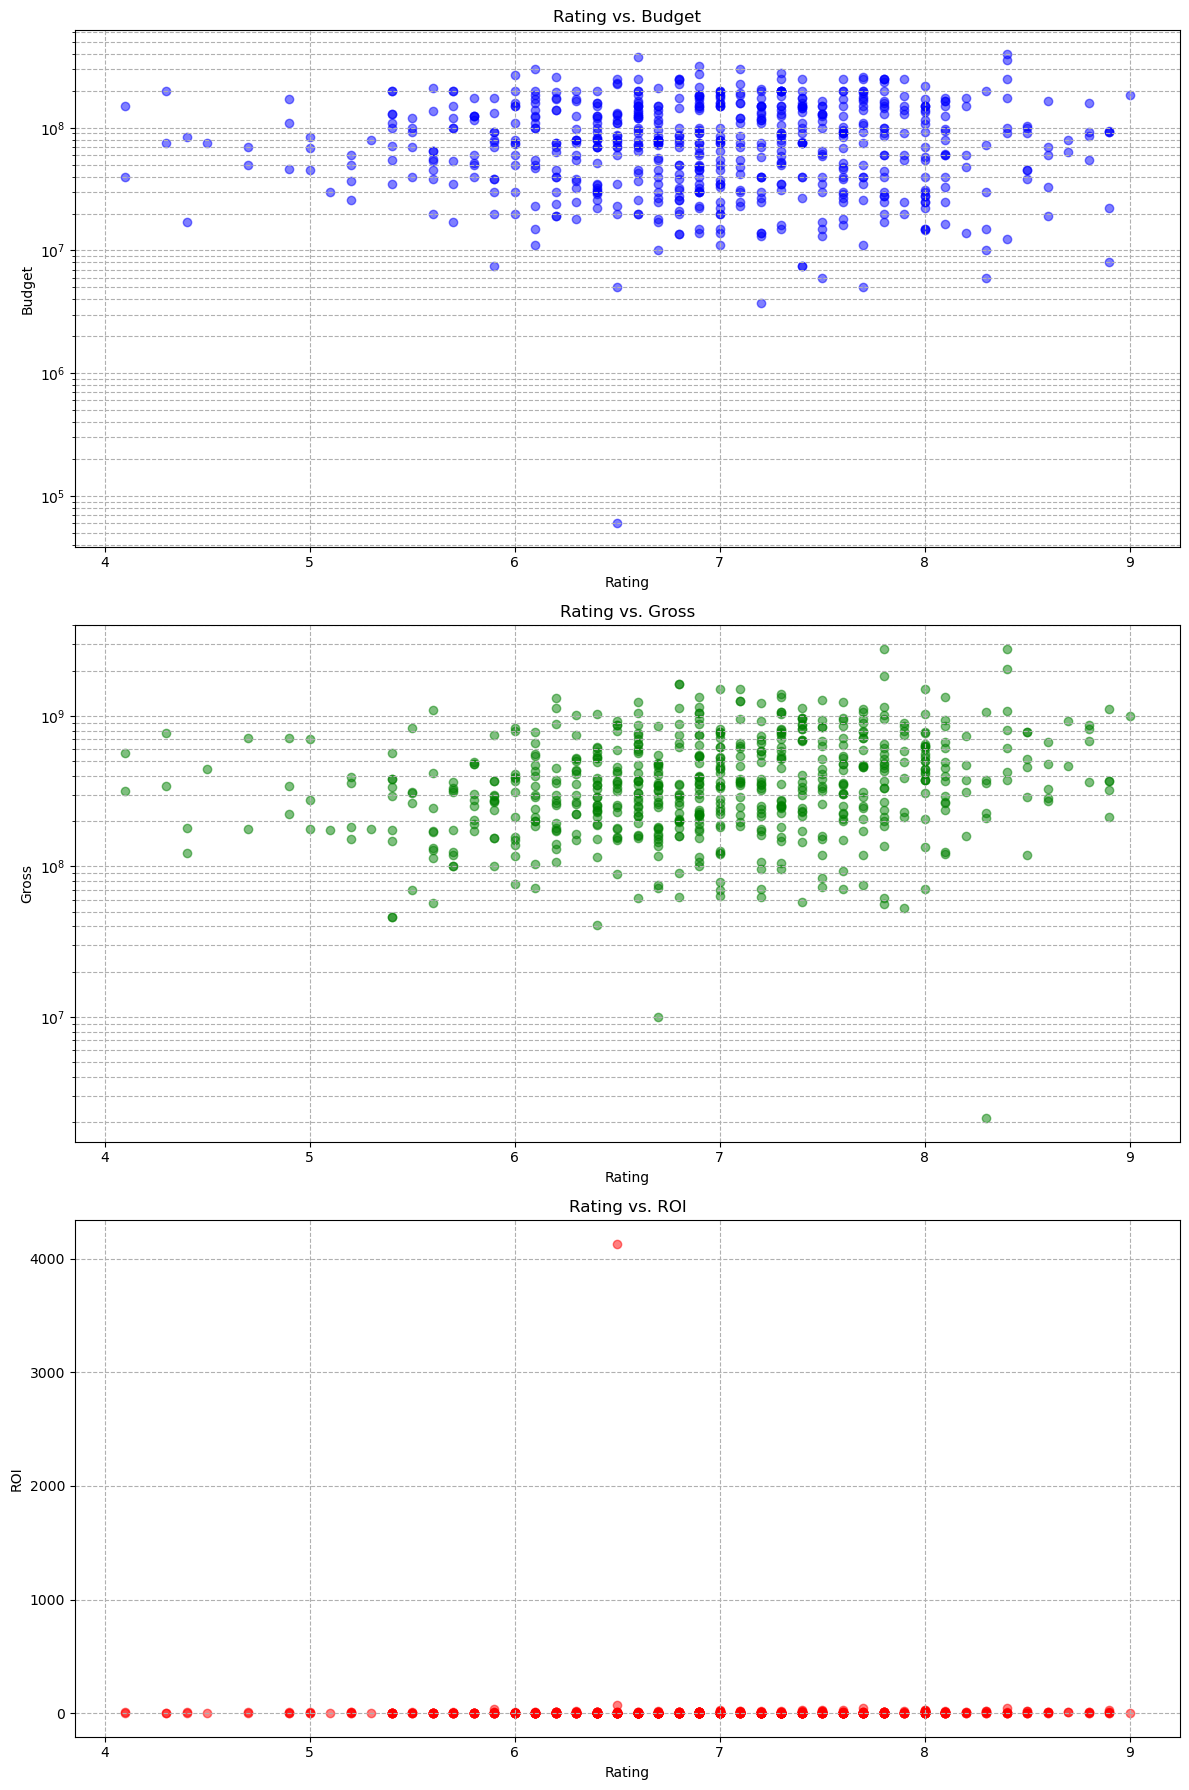

In [60]:
# Create scatter plots to visualize the relationships
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Scatter plot for Rating vs. Budget
ax[0].scatter(FirstQuestMerged["rating"], FirstQuestMerged["budget"], alpha=0.5, color="blue")
ax[0].set_title('Rating vs. Budget')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Budget')
ax[0].set_yscale('log')
ax[0].grid(True, which="both", ls="--")

# Scatter plot for Rating vs. Gross
ax[1].scatter(FirstQuestMerged["rating"], FirstQuestMerged["gross"], alpha=0.5, color="green")
ax[1].set_title('Rating vs. Gross')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Gross')
ax[1].set_yscale('log')
ax[1].grid(True, which="both", ls="--")

# Scatter plot for Rating vs. ROI
ax[2].scatter(FirstQuestMerged["rating"], FirstQuestMerged["ROI"], alpha=0.5, color="red")
ax[2].set_title('Rating vs. ROI')
ax[2].set_xlabel('Rating')
ax[2].set_ylabel('ROI')
#ax[2].set_yscale('symlog')
ax[2].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

In [ ]:

correlations = FirstQuestMerged[["rating", "budget", "gross", "ROI"]].corr()
rating_correlations = correlations["rating"]


In [ ]:
rating_correlations

In [ ]:
FinMerged = pd.merge(firstM_df, FirstQuestMerged , on="Countries")
FinMerged.columns

In [ ]:
#.rename(columns={}) 
FinMerged=FinMerged.rename(columns={"mpaa_rating":"Mpaa_rating", "rating":"Rating", "gross_y":"Gross", "budget_y":"Budget"})
FinMerged.head(2)

In [ ]:
FinalMerge = FinMerged [['Title', 'Mpaa_rating', 'Genre','Countries', 'Budget', 'Gross', 'Rating']]
FinalMerge

In [ ]:
SecQuestMerged = FinalMerge [['Countries', 'Budget', 'Gross', 'Rating']]
SecQuestMerged

In [ ]:
grossMerged

In [ ]:
# Generate a line plot of Gross vs. Budget 

plt.plot(grossMerged['Countries'])
      
plt.xlabel('T')
plt.ylabel('V')
plt.title(' trying')
plt.show()

In [ ]:
# Generate a line plot of Gross vs. Budget 

plt.plot(FirstQuestMerged['Countries'])
      
plt.xlabel('T')
plt.ylabel('V')
plt.title(' trying')
plt.show()

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
FirstQuestMerged.plot(kind='bar', color='blue', alpha=0.75)

plt.title('Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(SecQuestMerged['Budget'])

In [ ]:
plt.plot(SecQuestMerged['Gross'])

In [ ]:
FirstQuestMerged.plot.barh(x='Budget', y='Gross', figsize = (10,8), title = f" TT{FirstQuestMerged} ", legend = False)